<a href="https://colab.research.google.com/github/meriem-belkacemi/SIC/blob/master/K_means_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative


In [24]:
df = pd.read_csv("/content/CC_GENERAL.csv")

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [26]:
df.describe().columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [27]:
df.describe()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT       TENURE
count   8950.000000        8950.000000  ...       8950.000000  8950.000000
mean    1564.474828           0.877271  ...          0.153715    11.517318
std     2081.531879           0.236904  ...          0.292499     1.338331
min        0.000000           0.000000  ...          0.000000     6.000000
25%      128.281915           0.888889  ...          0.000000    12.000000
50%      873.385231           1.000000  ...          0.000000    12.000000
75%     2054.140036           1.000000  ...          0.142857    12.000000
max    19043.138560           1.000000  ...          1.000000    12.000000

[8 rows x 17 columns]

In [28]:
df.head(10)

CUST_ID      BALANCE  ...  PRC_FULL_PAYMENT  TENURE
0  C10001    40.900749  ...          0.000000      12
1  C10002  3202.467416  ...          0.222222      12
2  C10003  2495.148862  ...          0.000000      12
3  C10004  1666.670542  ...          0.000000      12
4  C10005   817.714335  ...          0.000000      12
5  C10006  1809.828751  ...          0.000000      12
6  C10007   627.260806  ...          1.000000      12
7  C10008  1823.652743  ...          0.000000      12
8  C10009  1014.926473  ...          0.000000      12
9  C10010   152.225975  ...          0.000000      12

[10 rows x 18 columns]

In [29]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [30]:
p=df.isnull().sum()/len(df)*100
new = pd.concat([df.isnull().sum(), p],axis=1,keys=['Total','%'])
new

Total         %
CUST_ID                               0  0.000000
BALANCE                               0  0.000000
BALANCE_FREQUENCY                     0  0.000000
PURCHASES                             0  0.000000
ONEOFF_PURCHASES                      0  0.000000
INSTALLMENTS_PURCHASES                0  0.000000
CASH_ADVANCE                          0  0.000000
PURCHASES_FREQUENCY                   0  0.000000
ONEOFF_PURCHASES_FREQUENCY            0  0.000000
PURCHASES_INSTALLMENTS_FREQUENCY      0  0.000000
CASH_ADVANCE_FREQUENCY                0  0.000000
CASH_ADVANCE_TRX                      0  0.000000
PURCHASES_TRX                         0  0.000000
CREDIT_LIMIT                          1  0.011173
PAYMENTS                              0  0.000000
MINIMUM_PAYMENTS                    313  3.497207
PRC_FULL_PAYMENT                      0  0.000000
TENURE                                0  0.000000

In [31]:
df.drop(columns={'CUST_ID'},axis=1,inplace=True)

In [32]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mode()[0], inplace = True)   

In [33]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mode()[0], inplace = True)   

In [34]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [48]:
from sklearn.preprocessing import normalize
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT    TENURE
0  0.039353           0.000787  ...           0.00000  0.011546
1  0.293876           0.000083  ...           0.00002  0.001101
2  0.310798           0.000125  ...           0.00000  0.001495
3  0.208899           0.000080  ...           0.00000  0.001504
4  0.504284           0.000617  ...           0.00000  0.007400

[5 rows x 17 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

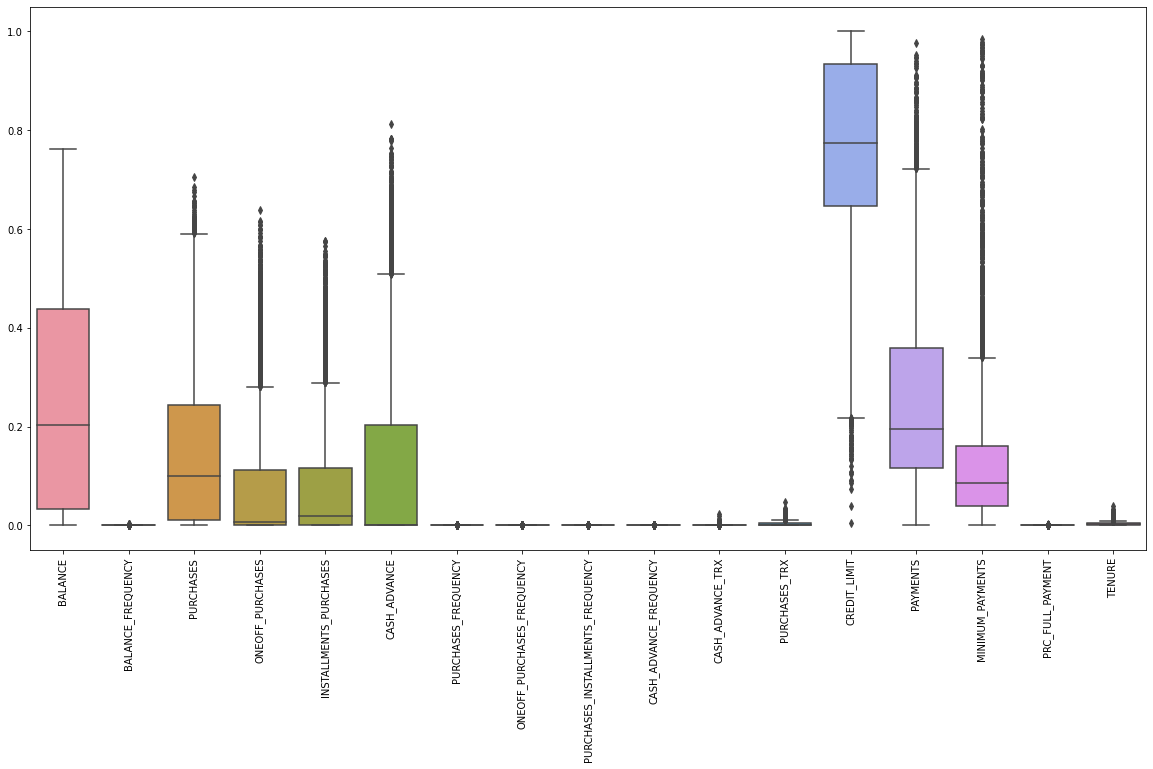

In [49]:
# boxplot
plt.figure(figsize=(20,10))
sns.boxplot(data=data_scaled)
plt.xticks(rotation=90)

Our data is full of outliers ! Let's drop then using z-score

In [50]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data_scaled))
print(z)

threshold = 3
print(np.where(z > 3))

data_scaled = data_scaled[(z < 3).all(axis=1)]

[[0.9374536  2.41926802 0.37283125 ... 0.04799812 0.40920646 2.83903993]
 [0.20655609 0.84833984 0.95279979 ... 0.21214926 0.22785637 0.88546845]
 [0.28261615 0.65734424 0.34429105 ... 0.35932602 0.40920646 0.7451329 ]
 ...
 [0.92688986 0.58340564 0.95279979 ... 0.35540132 0.40920646 0.21213369]
 [0.60057139 2.61705834 1.3594407  ... 0.17566125 0.40920646 1.0891238 ]
 [0.79968358 3.24319896 0.29288279 ... 0.98858314 0.40920646 2.39118152]]
(array([   5,    9,   10, ..., 7433, 7433, 7433]), array([14, 14,  3, ...,  1,  9, 10]))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

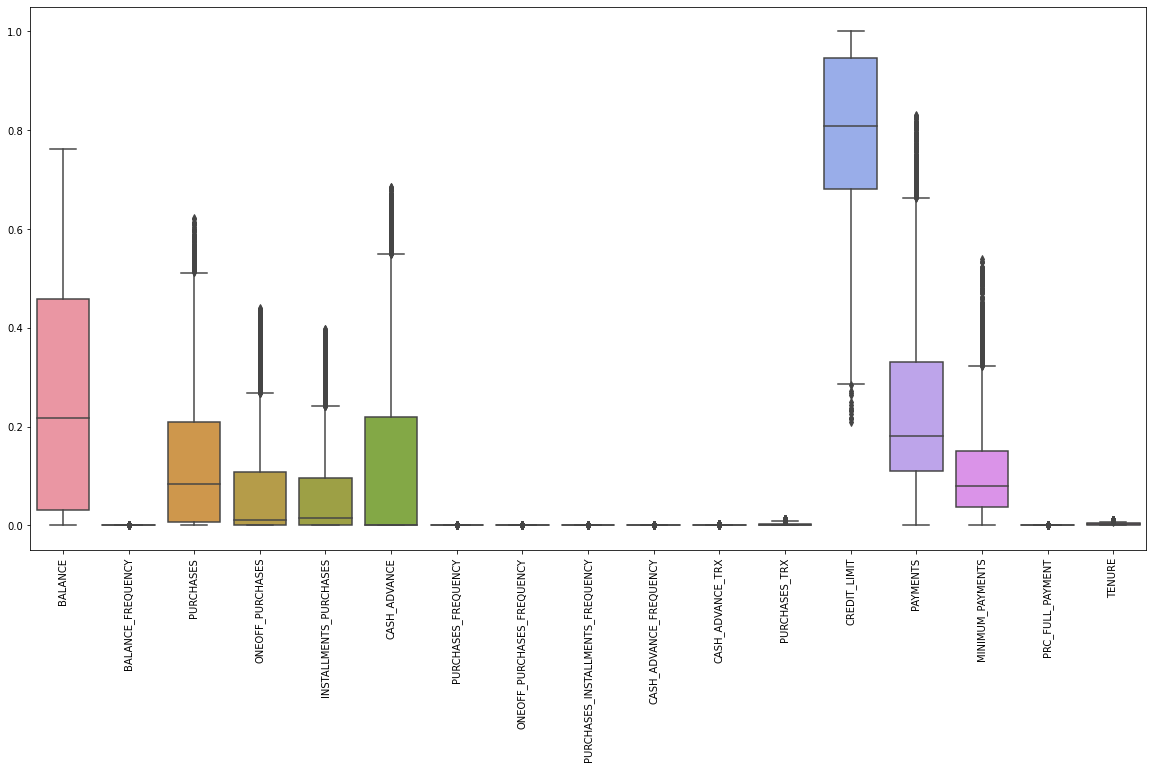

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_scaled)
plt.xticks(rotation=90)

# hierarchical clustering :

In [36]:
import scipy.cluster.hierarchy as shc


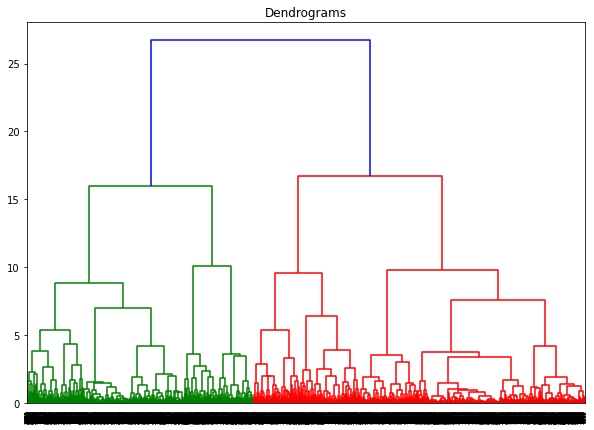

In [52]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

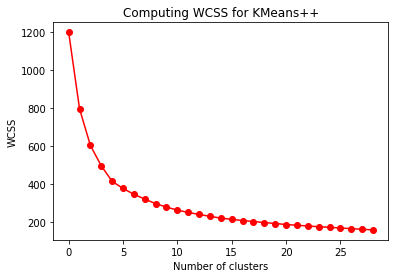

In [53]:
# using elbow methode to find the best k value
from sklearn.cluster import KMeans

wcss = []
for i in range( 1, 30 ):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( data_scaled )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

Let's try values between 4 and 7 ! 

In [54]:
model = KMeans(n_clusters=4, init="k-means++", n_init=10, max_iter=300) 
y_pred = model.fit_predict( data_scaled )

In [55]:
model = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
y_pred2 = model.fit_predict( data_scaled )

In [56]:
model = KMeans(n_clusters=6, init="k-means++", n_init=10, max_iter=300) 
y_pred3 = model.fit_predict( data_scaled )

In [ ]:
model = KMeans(n_clusters=7, init="k-means++", n_init=10, max_iter=300) 
y_pred4 = model.fit_predict( data_scaled )

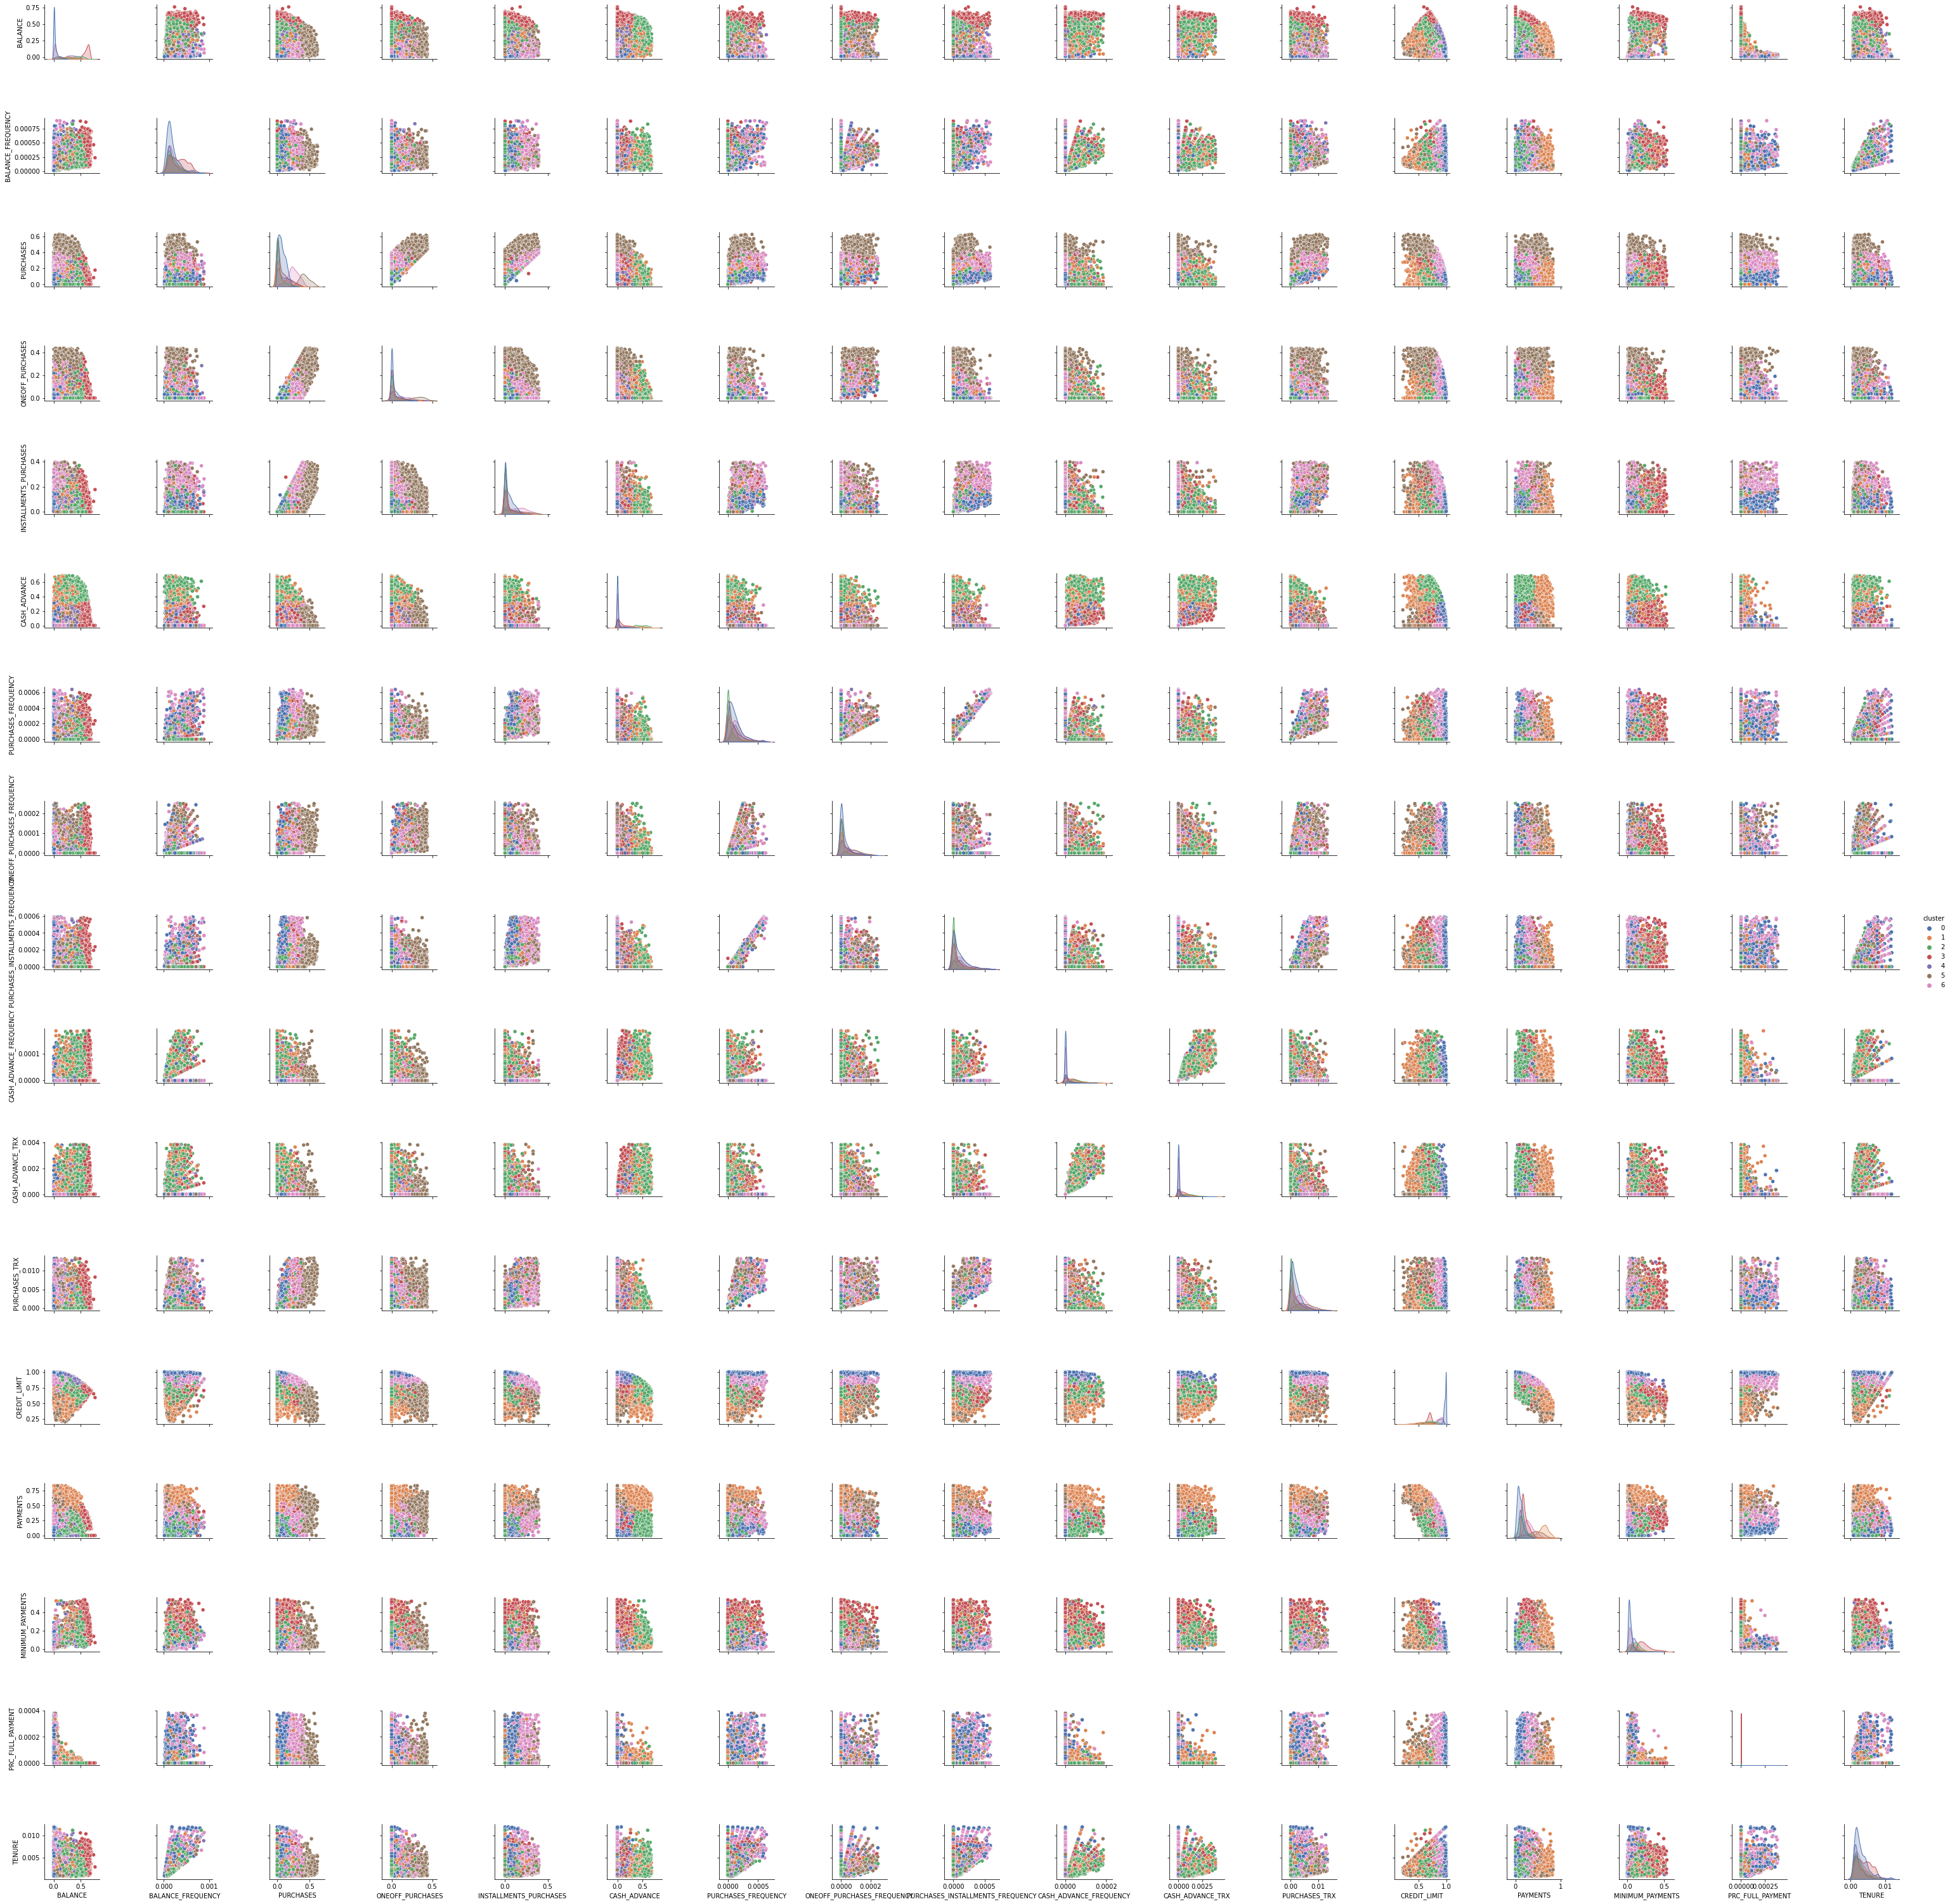

In [58]:
import seaborn as sns
data_scaled["cluster"] = y_pred3
cols = list(data_scaled.columns)
sns.pairplot( data_scaled[ cols ], hue="cluster" , palette='deep')

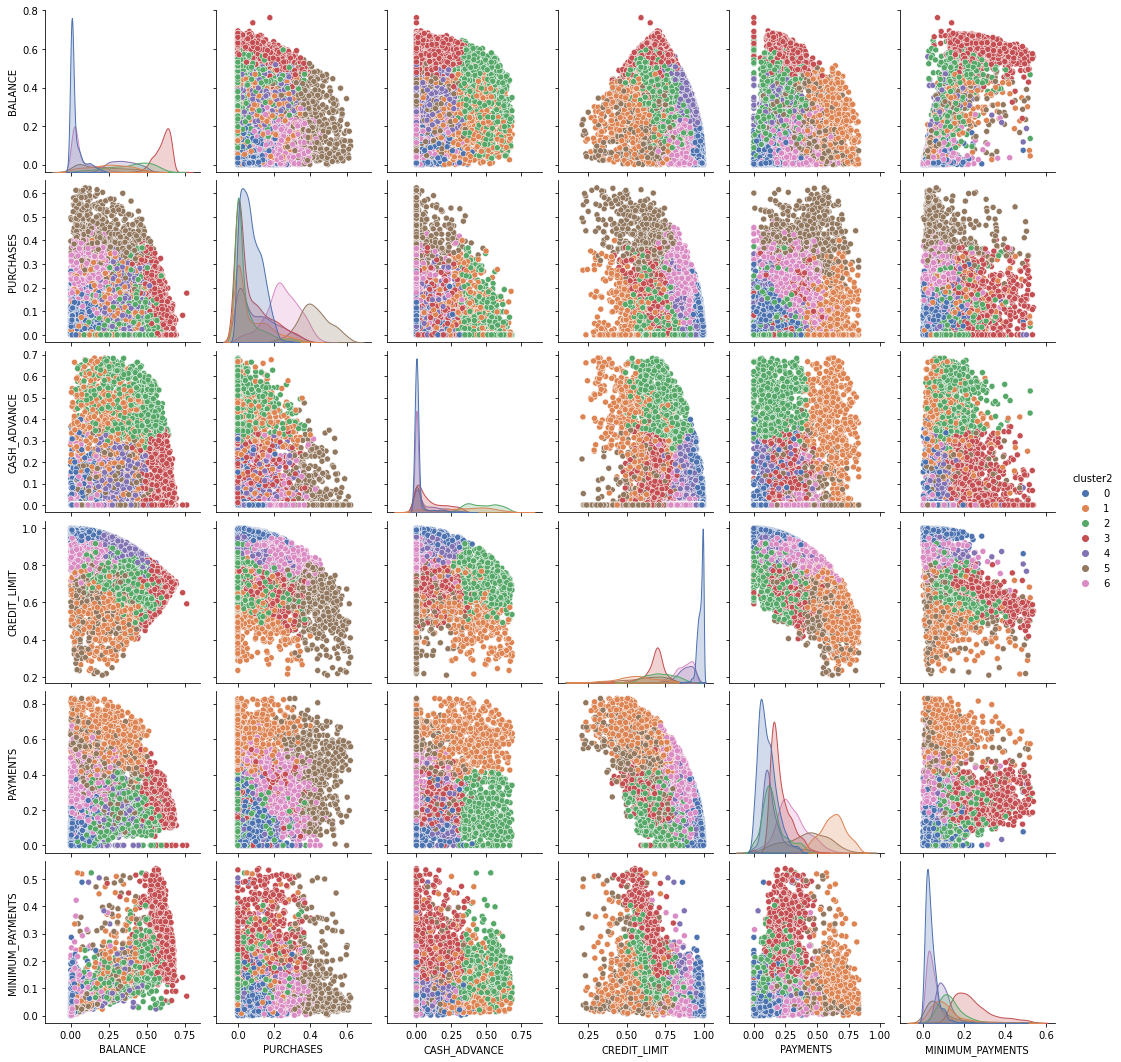

In [63]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]
model = KMeans(n_clusters=7, init="k-means++", n_init=10, max_iter=300)
y_pred = model.fit_predict( data_scaled[best_cols] )

data_scaled["cluster2"] = y_pred3
best_cols.append("cluster2")
sns.pairplot( data_scaled[ best_cols ], hue="cluster2" , palette='deep')